# Problem Statement(?)
----
Original Challenge:
Shopee National Data Science Challenge 2019 - Advanced
To build an automatic solution to extract product related information from large volume of images and free text data.

I will be looking at the mobile data (text and image) specifically to fill in as many columns as possible. I will be essentially doing a downsized version of the challenge which allows me to use make use of both text and image data to tackle a data science problem. 

Problem Statement:
How to extract mobile product related information using images and free text data?

# Mobile Data (Text)
----
We will first do some EDA on the raw mobile data set to see how we can 'Divide-and-Conquer' the problem.

## Imports

In [1]:
import pandas as pd

## Loading the Data

In [2]:
mobile = pd.read_csv('mobile_data_info_train_competition.csv')

In [3]:
# checking the shape of the data set
mobile.shape

(160330, 14)

In [4]:
mobile.info

<bound method DataFrame.info of             itemid                                              title  \
0          2346660  apple iphone 4s back glass spare part original...   
1          2816338                               iphone 4s 64gb white   
2          2847602                    samsung sm b310e piton dual sim   
3          3116949      samsung caramel gt e1272 dual sim 32 mb putih   
4          3794648                 garskin sony experia z z1 z2 ultra   
...            ...                                                ...   
160325  1510771637  beli 2 gratis 1 xiaomi mi mix black 6 64 rom g...   
160326  1515822742  android i phone x real 4g 16gb free wireless c...   
160327  1516747666                     xiaomi mia1 ram 4gb 64gb black   
160328  1517270941                   khusus hari ini samsung j2 prime   
160329  1518889125            oppo a83 2 gb new garansi resmi 1 tahun   

                                               image_path  Operating System  \
0       mobi

In [5]:
# looking at the data set
mobile.head()

,itemid,title,image_path,Operating System,Features,Network Connections,Memory RAM,Brand,Warranty Period,Storage Capacity,Color Family,Phone Model,Camera,Phone Screen Size
0,2346660,apple iphone 4s back glass spare part original...,mobile_image/a9c8f0fdd6587deed197634066cf7eee.jpg,NaN,NaN,NaN,NaN,2.0,NaN,NaN,12.0,1526.0,NaN,NaN
1,2816338,iphone 4s 64gb white,mobile_image/3b9a11608551b11b9330268e0d055e01.jpg,NaN,NaN,NaN,NaN,2.0,NaN,3.0,12.0,NaN,NaN,NaN
2,2847602,samsung sm b310e piton dual sim,mobile_image/1d719e936841a83c165da620f927de68.jpg,NaN,NaN,NaN,NaN,43.0,13.0,NaN,12.0,NaN,NaN,NaN
3,3116949,samsung caramel gt e1272 dual sim 32 mb putih,mobile_image/1d35a74d90df6cf4a02e6a5df9e9ff29.jpg,NaN,NaN,NaN,NaN,43.0,13.0,NaN,12.0,NaN,NaN,NaN
4,3794648,garskin sony experia z z1 z2 ultra,mobile_image/5556577b09539a9c0db0d00e0f171e2d.jpg,6.0,NaN,0.0,NaN,38.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# dropping rows with empty cells
mobile.dropna()

,itemid,title,image_path,Operating System,Features,Network Connections,Memory RAM,Brand,Warranty Period,Storage Capacity,Color Family,Phone Model,Camera,Phone Screen Size


It seems that every row has at least 1 missing value, as such I will start the classification problem with the columm which has the least number of missing values. 

In [7]:
# looking at the nulls in each column
mobile.isnull().sum().sort_values(ascending=True)

itemid                      0
title                       0
image_path                  0
Brand                    5292
Color Family            75499
Phone Model             75821
Storage Capacity        97180
Memory RAM             103293
Warranty Period        112257
Operating System       115052
Features               120985
Phone Screen Size      127636
Camera                 135740
Network Connections    136906
dtype: int64

## Mobile Data (Images)

### Imports

In [9]:
import matplotlib.pyplot as plt
import cv2

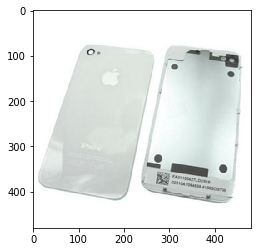

In [14]:
# displaying the first image
for img in mobile['image_path']:
    plt.imshow(cv2.imread(img))
    plt.show()
    break

In [15]:
# displaying the image array
cv2.imread(mobile['image_path'][0])

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]